## Web Crawing
- 웹 페이지에서 데이터를 수집하는 방법에 대해서 학습

### 웹크롤링 방법

#### 웹페이지의 종류
- 정적인 페이지 : 웹 브라우져에 화면이 한번 뜨면 이벤트에 의한 화면의 변경이 없는 페이지 
- 동적인 페이지 : 웹 브라우져에 화면이 뜨고 이벤트가 발생하면 서버에서 데이터를 가져와 화면을 변경하는 페이지

#### requests 이용
- 받아오는 문자열에 따라 두가지 방법으로 구분
    - json 문자열로 받아서 파싱하는 방법 : 주로 동적 페이지 크롤링할때 사용 
    - html 문자열로 받아서 파싱하는 방법 : 주로 정적 페이지 크롤링할때 사용
        
#### selenium 이용
- 브라우져를 직접 열어서 데이터를 받는 방법

#### 크롤링 방법에 따른 속도
- requests json > requests html > selenium

### Crwaling Naver Stock Datas
- 네이버 증권 사이트에서 주가 데이터 수집
- 수집할 데이터 : 일별 kospi, kosdaq 주가, 일별 환율(exchange rate) 데이터
- 데이터 수집 절차
    - 웹서비스 분석 : url
    - 서버에 데이터 요청 : request(url) > response : json(str)
    - 서버에서 받은 데이터 파싱(데이터 형태를 변경) : json(str) > list, dict > DataFrame

In [2]:
import warnings
warnings.filterwarnings('ignore')
import requests
import pandas as pd 

#### 1. 웹서비스 분석 : url
- pc 웹페이지가 복잡하면 mobile 웹페이지에서 수집

In [80]:
page, pagesize = 1,60
#url = f'https://m.stock.naver.com/api/index/KOSPI/enrollStocks?pageSize={pagesize}&page={page}&type=object'
url = f'https://m.stock.naver.com/api/index/KOSPI/price?pageSize={pagesize}&page={page}'

print(url)

https://m.stock.naver.com/api/index/KOSPI/price?pageSize=60&page=1


#### 2. 서버에 데이터 요청 : request(url) > response : json(str)
- response의 status code가 200이 나오는지 확인
- 403이나 500이 나오면 request가 잘못되거나 web server에서 수집이 안되도록 설정이 된것임
    - header 설정 또는 selenium 사용
- 200이 나오더라도 response 안에 있는 내용을 확인 > 확인하는 방법 : response.text

In [81]:
response = requests.get(url)
response

<Response [200]>

In [82]:
response.text[:200]

'[{"localTradedAt":"2023-08-24","closePrice":"2,537.68","compareToPreviousClosePrice":"32.18","compareToPreviousPrice":{"code":"2","text":"상승","name":"RISING"},"fluctuationsRatio":"1.28","openPrice":"2'

#### 3. 서버에서 받은 데이터 파싱(데이터 형태를 변경) : json(str) > list, dict > DataFrame

In [83]:
type(response.json())
data = response.json()
data
#data['result']

[{'localTradedAt': '2023-08-24',
  'closePrice': '2,537.68',
  'compareToPreviousClosePrice': '32.18',
  'compareToPreviousPrice': {'code': '2', 'text': '상승', 'name': 'RISING'},
  'fluctuationsRatio': '1.28',
  'openPrice': '2,531.78',
  'highPrice': '2,539.44',
  'lowPrice': '2,520.73'},
 {'localTradedAt': '2023-08-23',
  'closePrice': '2,505.50',
  'compareToPreviousClosePrice': '-10.24',
  'compareToPreviousPrice': {'code': '5', 'text': '하락', 'name': 'FALLING'},
  'fluctuationsRatio': '-0.41',
  'openPrice': '2,510.00',
  'highPrice': '2,517.51',
  'lowPrice': '2,499.89'},
 {'localTradedAt': '2023-08-22',
  'closePrice': '2,515.74',
  'compareToPreviousClosePrice': '6.94',
  'compareToPreviousPrice': {'code': '2', 'text': '상승', 'name': 'RISING'},
  'fluctuationsRatio': '0.28',
  'openPrice': '2,528.39',
  'highPrice': '2,533.43',
  'lowPrice': '2,509.53'},
 {'localTradedAt': '2023-08-21',
  'closePrice': '2,508.80',
  'compareToPreviousClosePrice': '4.30',
  'compareToPreviousPrice'

In [36]:
columns = ["localTradedAt", "closePrice"]
kospi = pd.DataFrame(data)[columns]
kospi.tail(2)

,localTradedAt,closePrice
58,2023-06-01,"2,569.17"
59,2023-05-31,"2,577.12"


#### 4. 함수로 만들기

In [42]:
def stock_crawling(code='KOSPI', page=1, pagesize=60):
    url = f'https://m.stock.naver.com/api/index/{code}/price?pageSize={pagesize}&page={page}'
    response = requests.get(url)
    data = response.json()
    columns = ["localTradedAt", "closePrice"]
    kospi = pd.DataFrame(data)[columns]
    return kospi

In [39]:
kospi_df = stock_crawling()
kospi_df.tail(2)

,localTradedAt,closePrice
58,2023-06-01,"2,569.17"
59,2023-05-31,"2,577.12"


In [43]:
kosdaq_df = stock_crawling('KOSDAQ') 
kosdaq_df.tail(2)

,localTradedAt,closePrice
58,2023-06-01,863.78
59,2023-05-31,856.94


#### 5. 원달러 환율 데이터 수집 : 실습

In [51]:
page, pagesize = 1, 60
url = f'https://m.stock.naver.com/front-api/v1/marketIndex/prices?page={page}&category=exchange&reutersCode=FX_USDKRW&pageSize={pagesize}'
response = requests.get(url)
data = response.json()['result']
usd_df = pd.DataFrame(data)[['localTradedAt','closePrice']]
usd_df.tail(2)


,localTradedAt,closePrice
58,2023-06-01,"1,320.00"
59,2023-05-31,"1,328.00"


len(kospi_df), len(kosdaq_df), len(usd_df)

In [ ]:
# 데이터 분석
# 코스피, 코스닥, 원달러 환율의 상관분석
# 가설: 코프피가 높은면 원달러 환율은 낮고, 코스피가 낮으면 원달러 환율은 높다.
# 가설 O : 환율이 낮으면 달러를 산다. 환율이 높으면 달러를 팔아서 코스피 산다. 


#### 6. 시각화

In [63]:
#전처리 : 데이터 합치기 + 데이터 타입 변경 
df = kospi_df.copy()
df.columns=['date','kospi']
df['kospi'] = kospi_df['closePrice'].apply(lambda data: float(data.replace(',','')))
df['kosdaq'] = kosdaq_df['closePrice'].apply(lambda data: float(data.replace(',','')))
df['usd'] = usd_df['closePrice'].apply(lambda data: float(data.replace(',','')))
df.dtypes

date       object
kospi     float64
kosdaq    float64
usd       float64
dtype: object

In [64]:
#해상도 높이기
%config InlineBackend.figure_formats = {'png','retina'}
import matplotlib.pyplot as plt
import seaborn as sns

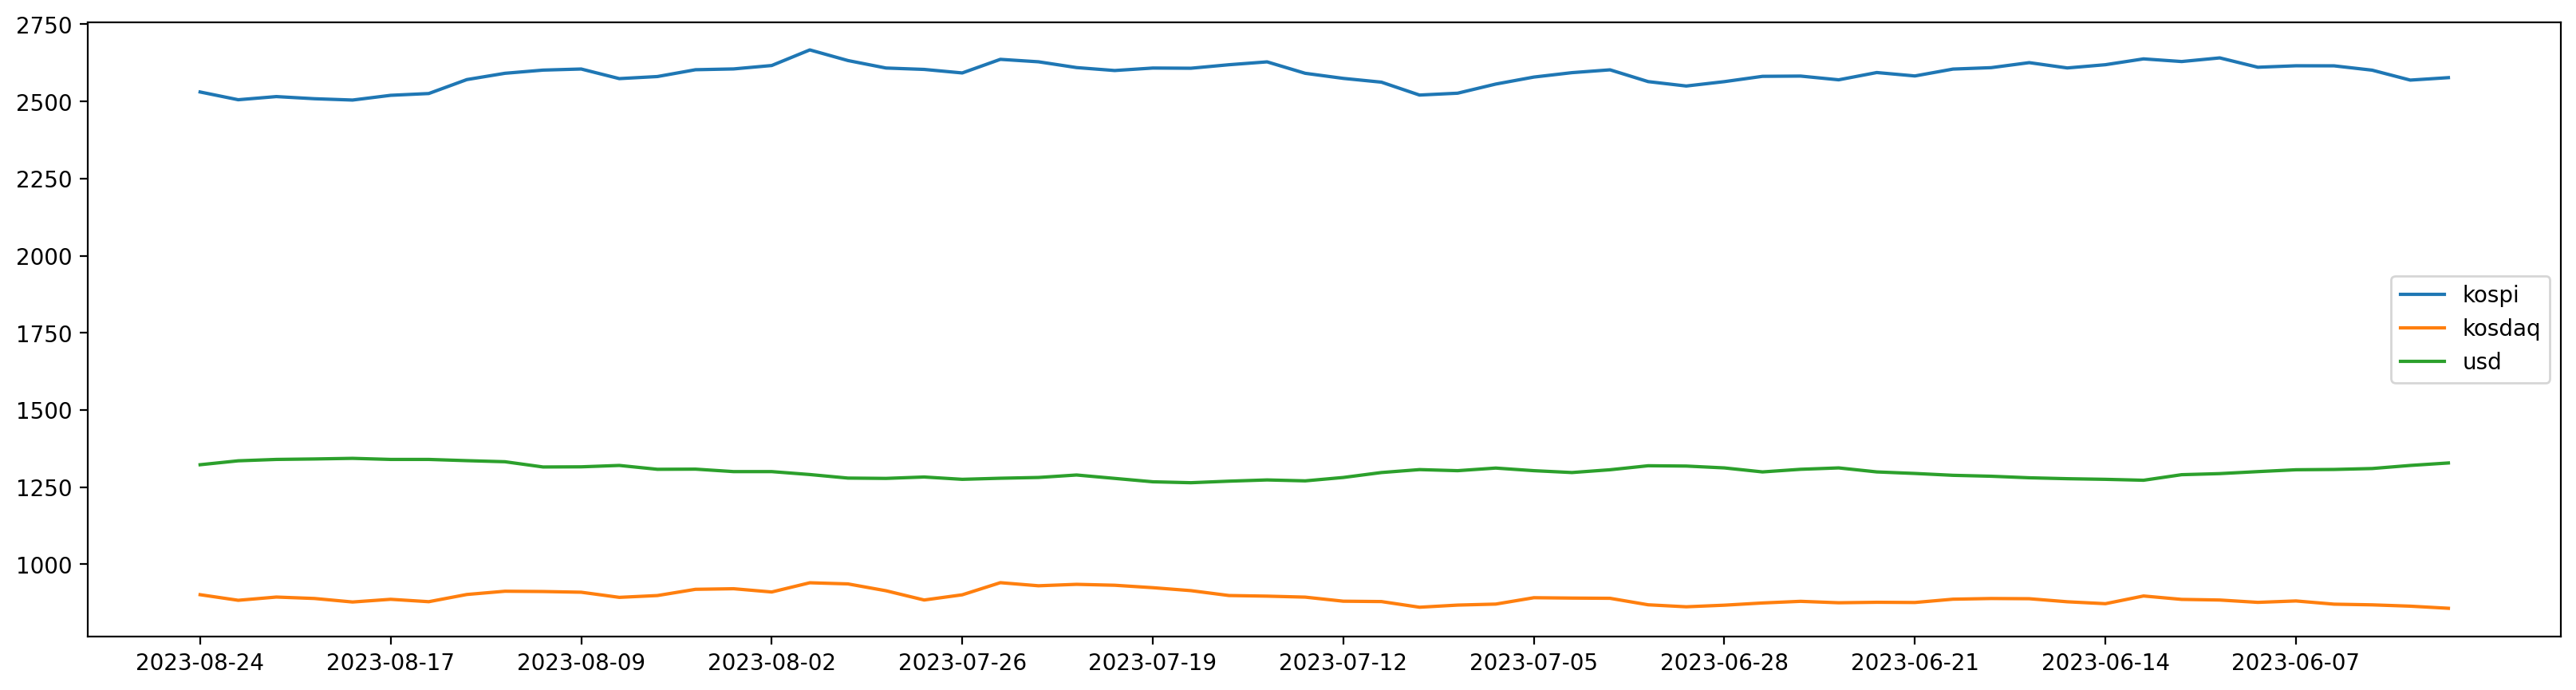

In [66]:
plt.figure(figsize=(20,5))
plt.plot(df['date'], df['kospi'], label='kospi')
plt.plot(df['date'], df['kosdaq'] , label='kosdaq')
plt.plot(df['date'], df['usd'],label='usd')
plt.xticks(df['date'][::5])       ### 5개씩 점프..!!!
plt.legend()
plt.show()

#### 7. 데이터 스케일링
- min max scaling


- $z = \frac{x_i - min(x)}{max(x) - min(x)} (0 \leqq z \leqq 1)$


- latex syntax : `https://jjycjnmath.tistory.com/117`

In [72]:
from sklearn.preprocessing import minmax_scale
minmax_scale(df['kospi'])

array([0.1609153 , 0.0061512 , 0.06913945, 0.02645014, 0.        ,
       0.09442086, 0.13003629, 0.40825491, 0.5336778 , 0.59703512,
       0.61893338, 0.42738513, 0.46878268, 0.60466261, 0.62059421,
       0.68874946, 1.        , 0.78784524, 0.63861721, 0.61087532,
       0.54044412, 0.81171188, 0.76293289, 0.64747493, 0.58885403,
       0.63812512, 0.63431137, 0.70431199, 0.76151812, 0.53349326,
       0.43193701, 0.35670788, 0.09964938, 0.13661807, 0.31857046,
       0.45826413, 0.54628775, 0.60263271, 0.36771852, 0.28000246,
       0.36716491, 0.47296549, 0.47794796, 0.40351848, 0.54868672,
       0.48059298, 0.61764163, 0.64587562, 0.74607861, 0.63997047,
       0.70480408, 0.82087716, 0.76797687, 0.8406225 , 0.65417974,
       0.68339792, 0.68222919, 0.59580488, 0.39779787, 0.44669988])

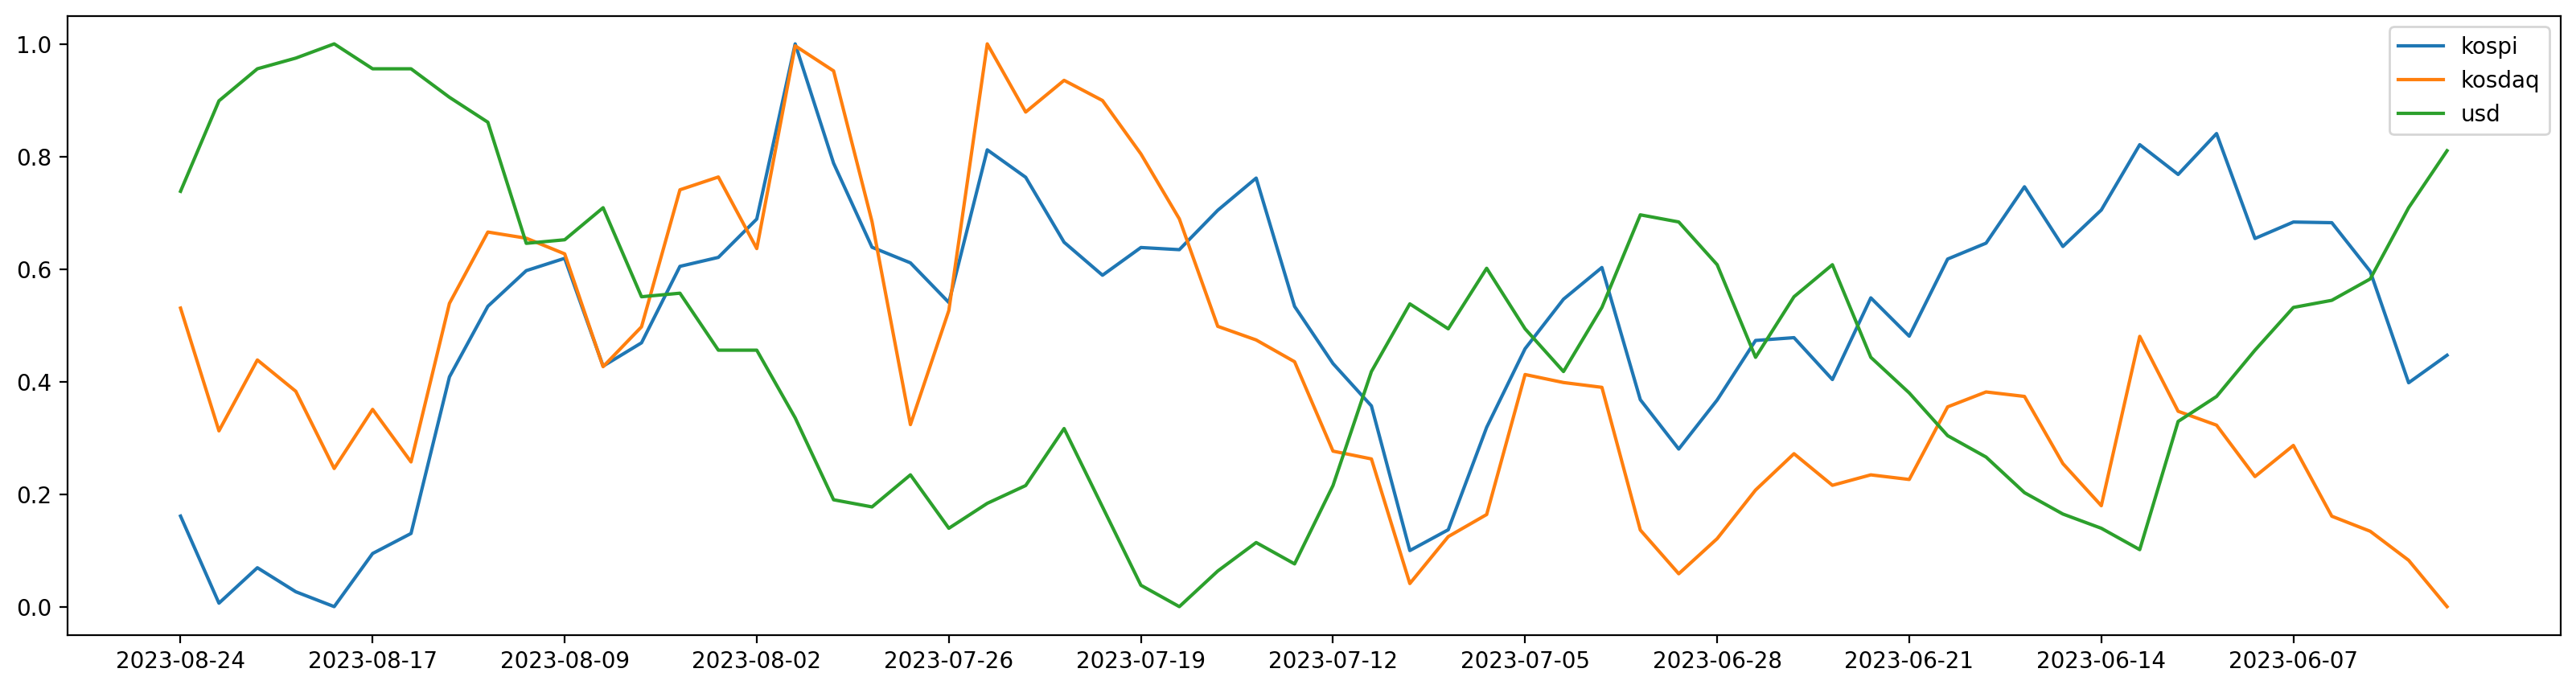

In [74]:
plt.figure(figsize=(20,5))
plt.plot(df['date'], minmax_scale(df['kospi']), label='kospi')
plt.plot(df['date'], minmax_scale(df['kosdaq']) , label='kosdaq')
plt.plot(df['date'], minmax_scale(df['usd']), label='usd')
plt.xticks(df['date'][::5])       ### 5개씩 점프..!!!
plt.legend()
plt.show()

#### 8. 상관관계 분석
- 피어슨 상관계수(Pearson Correlation Coefficient)
- 두 데이터 집합의 상관도를 분석할때 사용되는 지표
- 상관계수의 해석
    - -1에 가까울수록 서로 반대방향으로 움직임
    - 1에 가까울수록 서로 같은방향으로 움직임
    - 0에 가까울수록 두 데이터는 관계가 없음

In [75]:
df.corr()

,kospi,kosdaq,usd
kospi,1.000000,0.477647,-0.728321
kosdaq,0.477647,1.000000,-0.357008
usd,-0.728321,-0.357008,1.000000


#### 귀무 가설이 맞다,,? (대립가설이 맞아야 하는건데 귀무가설이 잘못된듯..)
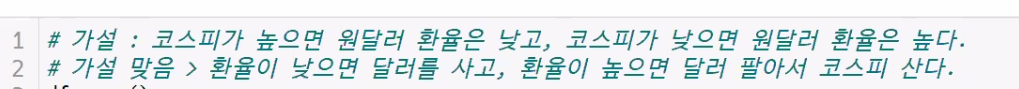

#### 데이터분석 절차
계획수립

데이터수집(크롤링, requests)

데이터처리(pandas)

데이터 분석 (pandas.sklearn)

레포팅 ,피드백 (mathplotlib)